# Final Project  IS 445: Netflix Show Popularity 

#### Part 3
Team members: Ankita Singh (arsingh3) & Ujjayini Bose(ubose3)

#### We wanted to perform analysis on popularity of shows on Netflix based on user rating, category and year of release. Tha dataset has several factors like rating of the show and its relation with the user rating, also the user rating size which indicates the size of the users. There can be a show with less user rating size but good ratings and a show with more user rating size but average rating. Let's see the results below

#### Importing the required libraries

In [19]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
!pip install wordcloud

In [21]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
import plotly.express as px
import seaborn as sns
from ipywidgets import interactive

#### Reading in the Netflix dataset

In [23]:
df = pd.read_excel('https://query.data.world/s/7x6n4kcl6ylroxel34djxmyovxfxyt')
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


#### Renaming column names for clarity

In [24]:
df.columns = ['Show Title', 'Category', 'Rating_level', 'Rating Description', 'Release Year', 'User Rating Score', 'User Rating Size']
df.head()

,Show Title,Category,Rating_level,Rating Description,Release Year,User Rating Score,User Rating Size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


#### Filling in null values to avoid discrepancy and to check the data type of each columns

In [25]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Title          1000 non-null   object 
 1   Category            1000 non-null   object 
 2   Rating_level        1000 non-null   object 
 3   Rating Description  1000 non-null   int64  
 4   Release Year        1000 non-null   int64  
 5   User Rating Score   1000 non-null   float64
 6   User Rating Size    1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


From the above output, we have 3 columns as object which means the value is stored in string format. We have remaining 3 as integers and float as seen in the output year. The total number of columns are initially 1000 but after dropping null values, it is 574. 

Netflix is the top OTT platform with many of its original series being massive hits. The dataset provides a list of shows along with attributes like release year, user rating, rating level, etc. The column names are self explanatory. Let's analyse the count and uniqueness of few columns

#### Converting the data type of the Show Title, Category, Rating level into String since Object type gives error when passed into values of interactive charts.

In [26]:
df['Show Title'] = df['Show Title'].astype('str')
df['Category'] = df['Category'].astype('str')
df['Rating level'] = df['Rating_level'].astype('str')
df.head()

,Show Title,Category,Rating_level,Rating Description,Release Year,User Rating Score,User Rating Size,Rating level
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,"crude and sexual humor, language and some drug..."
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82,"strong violence, sexual content and adult lang..."
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,Parents strongly cautioned. May be unsuitable ...
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,Parents strongly cautioned. May be unsuitable ...
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,Parental guidance suggested. May not be suitab...


### Word Cloud of the Rating Level of the Content Released

51281


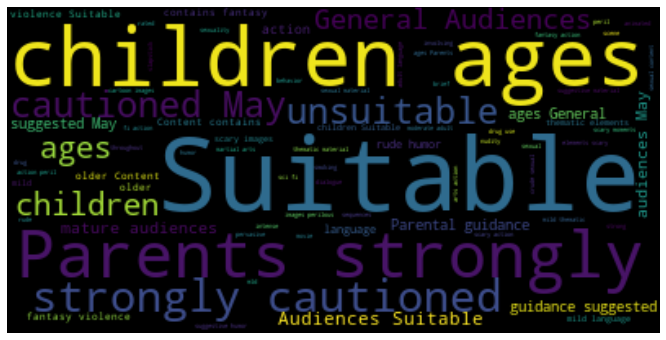

In [27]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
text=" ".join(str(v) for v in df.Rating_level)
print(len(text))
wordcloud=WordCloud(background_color="black").generate(text)
plt.figure(figsize= (20,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

This word cloud helps us analyze the popular reviews on which the rating level of the shows are based on. Basically, the bigger and bolder the word is, the more frequently it is used and the more relevant it is in a given textual document (rating_level of shows, in our case). Therefore, from the word cloud generated from our dataset, we can understand that shows in our dataset are unsuitable for children and need parental descretion and a cautious audience.

### Interactive bar plot summarizing count of appropriations:

In [28]:
# Interactive bar plot
# It has 3 parameters: xaxis and c
def fun1(xaxis, c):
    x = df[xaxis].value_counts().index
    y = df[xaxis].value_counts().values
    if xaxis == 'Category':         # There are a lot of show names, hence will require a bigger plot
        plt.figure(figsize=(30,10))
    else:
        plt.figure(figsize=(20,12))
    plt.bar(x, y, color = c)
    plt.xticks(rotation=70)
    plt.xlabel(xaxis)
    plt.ylabel('Count')
    plt.title('User Ratings Frequency distribution for')
    plt.show()


# Creating an interactive plot using 'interactive' function with all the necessary dropdowns
plot1 = interactive(fun1, 
                  xaxis = ipywidgets.Dropdown(
                      value='Category',
                      options=['Category', 'Rating level'],
                      description='x'
                  ),
                   c = ipywidgets.Dropdown(
                      value='red',
                      options=['red', 'blue', 'yellow', 'cyan', 'orange', 'green'],
                      description='Bar Color'
                   )
                  )
plot1

interactive(children=(Dropdown(description='x', options=('Category', 'Rating level'), value='Category'), Dropd…

The ratings of the series is an indicative of the target audience. The values here mean:
1. PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13
2. R: Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian
3. TV-14: Parents strongly cautioned – Some material may be inappropriate for children under 14
4. TV-PG: Parental guidance suggested – Some material may not be suitable for children
5. TV-MA: Mature Audience Only This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. This program contains one or more of the following: graphic violence (V), explicit sexual activity (S), or crude indecent language (L)
6. TV-Y: suitable for all children
7. NR: Not Rated
8. TV-Y7-FV: “fantasy violence” that may be more intense or combative than other TV-Y7 programs
9. UR: Unrated
10. PG: Parental Guidance Suggested, Some Material May Not Be Suitable for Children
11. TV-G: suitable for a general audience; not directed specifically toward kids, but contains little to no violence, sexual dialogue or content, or strong language
12. G: Appropriate for people of all ages
13. TV-Y7: directed toward kids 7 years and older.

The ratings of TV-14 has highest frequency whereas UR has the lowest.

### Interactive Scatter Plot of Releases over the years

In [29]:
px.scatter(df, x='Release Year', color='Category', hover_data=['Show Title'])

#### This interactive scatter plot distributes the categories of content on the basis of their released year. Thus we can understand the proportion of releases of the Movies/TV shows across all the years when we hover on it. As we hover over the dots, the pop up will display the Category from the legend,  Release year, index and Show Title in the same color as the dot.

### Contextual Visualization: Reading in the contextual dataset from a Kaggle

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [30]:
cntx_viz = pd.read_csv('data/netflix_titles.csv')
cntx_viz

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Movie Genres

In [31]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(cntx_viz, title):
    cntx_viz['genre'] = cntx_viz['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in cntx_viz['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = cntx_viz['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)

####  The data for the heatmap in the above function called genre_heatmap. We will now create the heatmap.

C:\Users\ujjay\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ujjay\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



There are 20 types in the Netflix Movie Dataset


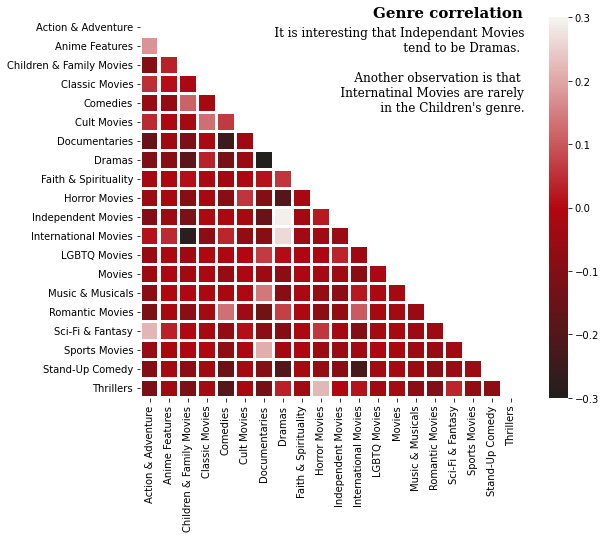

In [32]:
df_tv = cntx_viz[cntx_viz["type"] == "TV Show"]
df_movies = cntx_viz[cntx_viz["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

#### As seen in the output, the correlation between the movies and genres are shown here in the shades of red. For example, Sports Movies and Documentaries has positive correlation of 0.2. One of the lowest correlation value of -0.3 is between Dramas and Documentaries.

### Ratings 

We will initialize a flag which will store the count. Then, we create a dataframe of ratings vs count.

In [33]:
cntx_viz['count'] = 1
order = pd.DataFrame(cntx_viz.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

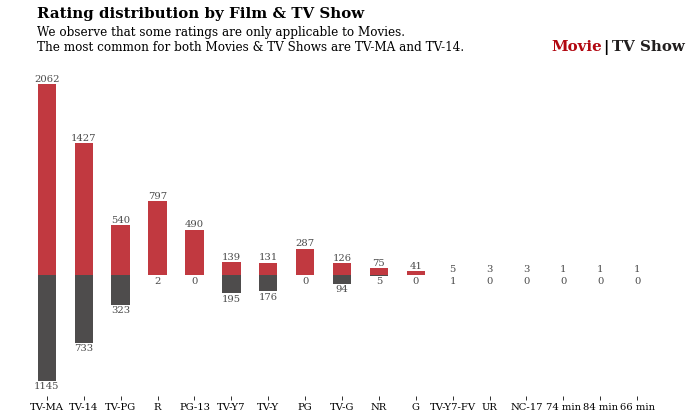

In [34]:
mf = cntx_viz.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

### Changes

In [35]:
cntx_viz["date_added"] = pd.to_datetime(cntx_viz['date_added'])
cntx_viz['year_added'] = cntx_viz['date_added'].dt.year

#### In the above code, we have added the datetime to the date_added column to convert it in that type. We have then stripped the year from the datetime to store it separately.

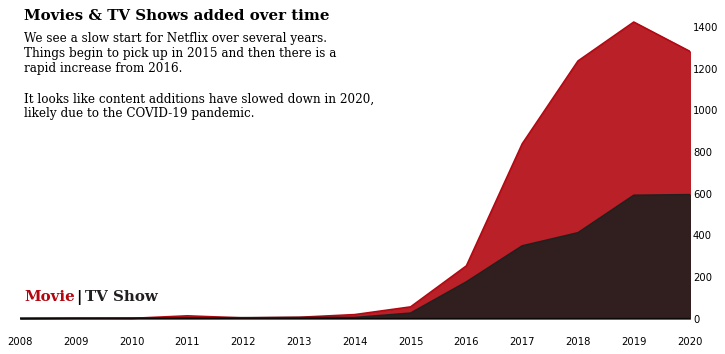

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(cntx_viz['type'].value_counts().index):
    mtv_rel = cntx_viz[cntx_viz['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

#### As seen in the years, both the movies & TV shows have grown almost exponentially on Netflix. It is the most streamed OTT platform. The movies are more popular and in more number compared to the TV shows. The red colored data represents the movies and black represents the TV shows

#### Learnings from the project:

We learned how to perform explanatory data analysis on the Netflix data. The visualizations have been made interactive with drop downs, labels, hover pop ups, etc. A new kind of library was used for wordcloud which we have previously not explored. It helped us identify the category with the boldness and size of words in wordcloud. We also learned how to use mybinder to present these visuals in a proper manner rather than simply share jupyter notebook. It can be hosted the the link can be shared for future references which is very helpful


I learned from Ankita how to import and setup wordcloud library, how to interpret the interactivity of the visualizations. We found the new dataset and tried to cross check some of the results with the first dataset especially factors that were directly related to the years and genres. 

#### What things went according to your group work plan

We planned on finding the popularity of the show mainly based on user ratings which went well in the early visualizations but then there were more factors that affected the ratings apart from the users. The user rating size helped in understanding how the ratings would have been turned into low average if the size of the users was very large. 


#### Things you'd like to do differently next time

The contextual dataset that we found while working on this project turned out to be more suitable for future visualizations scopes because of the values and variety of the data. If we had found it before, we would have used it as our primary dataset. Nonetheless, we will spend more time on trying out more datasets before finalizing on one.

References:
1. https://www.analyticsvidhya.com/blog/2021/07/visualizing-netflix-data-using-python/
2. https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download
3. https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
4. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html 